2023-11-24 16:44:51.820858: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-24 16:44:53.102089: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2023-11-24 16:44:53.102215: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/loca

Found 271 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 79 images belonging to 2 classes.
Print the class binary: {'kirmizi': 0, 'siirt': 1}
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2

2023-11-24 16:45:00.566632: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2023-11-24 16:45:00.566692: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-11-24 16:45:00.566721: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (instance-20231118-173352): /proc/driver/nvidia/version does not exist
2023-11-24 16:45:00.567097: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow 

Epoch 1/25
9/9 [==============================] - 8s 724ms/step - loss: 0.6899 - binary_accuracy: 0.5018 - val_loss: 0.6815 - val_binary_accuracy: 0.5250
Epoch 2/25
9/9 [==============================] - 5s 529ms/step - loss: 0.6820 - binary_accuracy: 0.5387 - val_loss: 0.6732 - val_binary_accuracy: 0.6500
Epoch 3/25
9/9 [==============================] - 5s 501ms/step - loss: 0.6738 - binary_accuracy: 0.7011 - val_loss: 0.6632 - val_binary_accuracy: 0.7750
Epoch 4/25
9/9 [==============================] - 4s 477ms/step - loss: 0.6634 - binary_accuracy: 0.8044 - val_loss: 0.6478 - val_binary_accuracy: 0.8000
Epoch 5/25
9/9 [==============================] - 4s 473ms/step - loss: 0.6492 - binary_accuracy: 0.7786 - val_loss: 0.6284 - val_binary_accuracy: 0.7750
Epoch 6/25
9/9 [==============================] - 4s 476ms/step - loss: 0.6282 - binary_accuracy: 0.7749 - val_loss: 0.5953 - val_binary_accuracy: 0.8250
Epoch 7/25
9/9 [==============================] - 5s 519ms/step - loss: 0.60

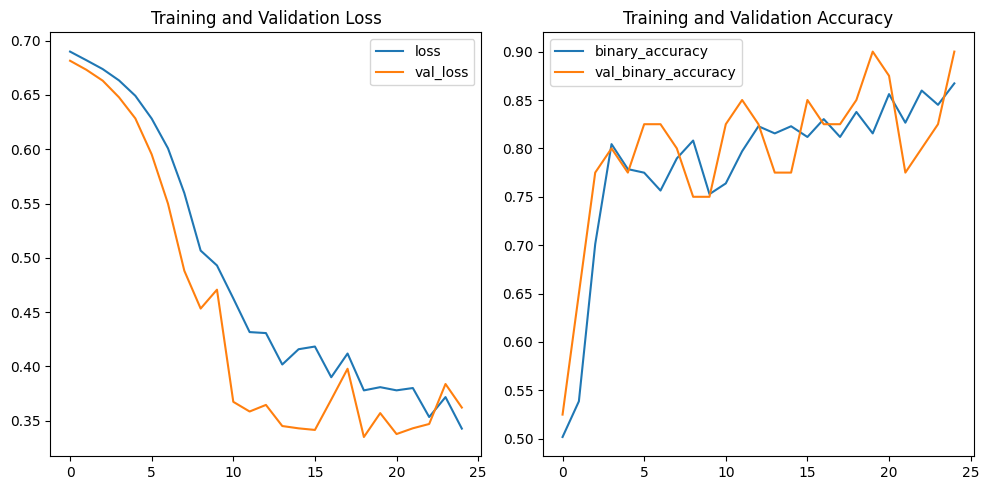

3/3 [==============================] - 0s 98ms/step - loss: 0.5560 - binary_accuracy: 0.7595
Validation Test accuracy:: 75.95%


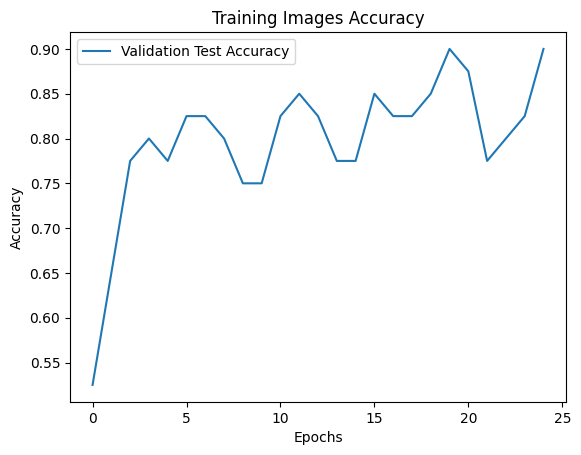

****************************************
Running 2nd model with Data Augmentation
****************************************
Found 271 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 79 images belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
        

3/3 [==============================] - 0s 94ms/step - loss: 0.5932 - binary_accuracy: 0.7975
Validation Test accuracy:: 79.75%


In [1]:
## Image Classification Model (using CNN)

# Import library
import requests, zipfile, shutil, os
requests.packages.urllib3.disable_warnings()
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models, optimizers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Define the URL to download the dataset #https://www.muratkoklu.com/datasets/
dataset_url = "https://www.muratkoklu.com/datasets/vtdhnd12.php"

# Download the dataset to a temporary file
response = requests.get(dataset_url)
with open("pistachio_dataset.zip", "wb") as f:
    f.write(response.content)

# Extract the dataset from the ZIP file
with zipfile.ZipFile("pistachio_dataset.zip", "r") as zip_ref:
    zip_ref.extractall()

# Delete the temporary ZIP file
os.remove("pistachio_dataset.zip")

# Define the source directories for the downloaded images
kirmizi_dir = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio/"
siirt_dir = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/Siirt_Pistachio/"

# Define the directories for train, test, and validation sets for both categories
train_dir_kirmizi = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/train/kirmizi"
test_dir_kirmizi = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/test/kirmizi"
validation_dir_kirmizi = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/validation/kirmizi"

train_dir_siirt = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/train/siirt"
test_dir_siirt = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/test/siirt"
validation_dir_siirt = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/validation/siirt"

# Create directories for train, test, and validation sets for both categories
for directory in [train_dir_kirmizi, test_dir_kirmizi, validation_dir_kirmizi,
                  train_dir_siirt, test_dir_siirt, validation_dir_siirt]:
    if not os.path.exists(directory):
        os.makedirs(directory)

# Define the number of images to copy for each set
train_images = 70
test_images = 10
validation_images = 20

# Copy Kirmizi images
kirmizi_image_files = os.listdir(kirmizi_dir)
np.random.shuffle(kirmizi_image_files)

# Train set
for i in range(train_images):
    source_path = os.path.join(kirmizi_dir, kirmizi_image_files[i])
    destination_path = os.path.join("./Pistachio_Image_Dataset/Pistachio_Image_Dataset/train/kirmizi/", kirmizi_image_files[i])
    shutil.copy2(source_path, destination_path)

# Test set
for i in range(train_images, train_images + test_images):
    source_path = os.path.join(kirmizi_dir, kirmizi_image_files[i])
    destination_path = os.path.join("./Pistachio_Image_Dataset/Pistachio_Image_Dataset/test/kirmizi/", kirmizi_image_files[i])
    shutil.copy2(source_path, destination_path)

# Validation set
for i in range(train_images + test_images, train_images + test_images + validation_images):
    source_path = os.path.join(kirmizi_dir, kirmizi_image_files[i])
    destination_path = os.path.join("./Pistachio_Image_Dataset/Pistachio_Image_Dataset/validation/kirmizi/", kirmizi_image_files[i])
    shutil.copy2(source_path, destination_path)

# Copy Siirt images
siirt_image_files = os.listdir(siirt_dir)
np.random.shuffle(siirt_image_files)

# Train set
for i in range(train_images):
    source_path = os.path.join(siirt_dir, siirt_image_files[i])
    destination_path = os.path.join("./Pistachio_Image_Dataset/Pistachio_Image_Dataset/train/siirt/", siirt_image_files[i])
    shutil.copy2(source_path, destination_path)

# Test set
for i in range(train_images, train_images + test_images):
    source_path = os.path.join(siirt_dir, siirt_image_files[i])
    destination_path = os.path.join("./Pistachio_Image_Dataset/Pistachio_Image_Dataset/test/siirt/", siirt_image_files[i])
    shutil.copy2(source_path, destination_path)

# Validation set
for i in range(train_images + test_images, train_images + test_images + validation_images):
    source_path = os.path.join(siirt_dir, siirt_image_files[i])
    destination_path = os.path.join("./Pistachio_Image_Dataset/Pistachio_Image_Dataset/validation/siirt/", siirt_image_files[i])
    shutil.copy2(source_path, destination_path)


# Define the path to the downloaded dataset
train_dir = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/train/"
test_dir = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/test/"
validation_dir = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/validation/"

# Image data preprocessing
train_imagerescale = ImageDataGenerator(rescale=1./255) ### RGB to convert 0,1
test_imagerescale = ImageDataGenerator(rescale=1./255)  ### RGB to convert 0,1
validation_imagerescale = ImageDataGenerator(rescale=1./255)  ### RGB to convert 0,1

train_images = train_imagerescale.flow_from_directory(
    train_dir,
    target_size = (128, 128),
    class_mode = 'binary'
)

test_images = test_imagerescale.flow_from_directory(
    test_dir,
    target_size = (128, 128),
    class_mode = 'binary'
)

validation_images = validation_imagerescale.flow_from_directory(
    validation_dir,
    target_size = (128, 128),
    class_mode = 'binary'
)
print(f"Print the class binary: {train_images.class_indices}")

# Define the ANN model
model = models.Sequential()

# Convolutional layer with 32 filters, 3x3 kernel, and ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional layer with 64 filters, 3x3 kernel, and ReLU activation
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional layer with 128 filters, 3x3 kernel, and ReLU activation
model.add(layers.Conv2D(128, (3, 3), activation='relu',))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output of the convolutional layers
model.add(layers.Flatten())

# Fully connected layer with 64 neurons and ReLU activation
model.add(layers.Dense(64, activation = 'relu'))

# Output layer with 1 neuron and sigmoid activation for binary classification
model.add(layers.Dense(1, activation = 'sigmoid'))


# # Define the CNN model
# model = models.Sequential()

# # Convolutional layer with 32 filters, 3x3 kernel, and ReLU activation
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
# model.add(layers.MaxPooling2D((2, 2)))

# # Flatten the output of the convolutional layers
# model.add(layers.Flatten())

# # Fully connected layer with 128 neurons and ReLU activation
# model.add(layers.Dense(128, activation = 'relu'))

# # Output layer with 10 neuron and softmax activation for binary classification
# model.add(layers.Dense(10, activation = 'softmax'))

# Show model summary
model.summary()

# Compile the ANN model with binary cross-entropy loss and binary accuracy metric
model.compile(
    loss = 'binary_crossentropy',
    optimizer = optimizers.Adam(epsilon=0.01),
    metrics = ['binary_accuracy']
)

# # Compile the CNN model with sparse_categorical cross-entropy loss and accuracy metric
# model.compile(
#     loss = 'sparse_categorical_crossentropy',
#     optimizer = optimizers.Adam(epsilon=0.01),
#     metrics = ['accuracy']
# )

# Train the ANN model
history = model.fit(train_images, validation_data=test_images,epochs=25)


# # Train the CNN model
# history = model.fit(train_images,validation_data=test_images,epochs=25)

# Plot training history for ANN model
history_frame = pd.DataFrame(history.history)

# Plotting Loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
history_frame.loc[:, ['loss', 'val_loss']].plot(ax=plt.gca())
plt.title('Training and Validation Loss')

# Plotting Accuracy
plt.subplot(1, 2, 2)
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(ax=plt.gca())
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

# # Plot training history for CNN model
# history_frame = pd.DataFrame(history.history)

# # Plotting Loss
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# history_frame.loc[:, ['loss', 'val_loss']].plot(ax=plt.gca())
# plt.title('Training and Validation Loss')

# # Plotting Accuracy
# plt.subplot(1, 2, 2)
# history_frame.loc[:, ['accuracy', 'val_accuracy']].plot(ax=plt.gca())
# plt.title('Training and Validation Accuracy')

# plt.tight_layout()
# plt.show()

# Evaluate the model on the validation set
test_loss, val_acc = model.evaluate(validation_images)
# print('Validation Test accuracy:', val_acc)
print(f'Validation Test accuracy:: {val_acc * 100:.2f}%')

# Plotting the test accuracy
plt.plot(history.history['val_binary_accuracy'], label='Validation Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Images Accuracy')
plt.show()


# # Evaluate the model on the validation set
# validation_loss, validation_acc = model.evaluate(validation_images) #validation_labels
# print('Test accuracy:', validation_acc)

# # Plotting the test accuracy
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.title('Validation Images Accuracy')
# plt.show()

print('*' * 40)
print('Running 2nd model with Data Augmentation')
print('*' * 40)

# Data Augmentation and 2nd model
train_imagerescale = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
train_images = train_imagerescale.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    class_mode = 'binary'
)

test_imagerescale = ImageDataGenerator(rescale=1./255)
test_images = test_imagerescale.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    class_mode = 'binary'
)

validation_imagerescale = ImageDataGenerator(rescale=1./255)
validation_images = validation_imagerescale.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    class_mode = 'binary'
)

# Define the ANN model
model = models.Sequential()

# Convolutional layer with 32 filters, 3x3 kernel, and ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional layer with 64 filters, 3x3 kernel, and ReLU activation
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional layer with 128 filters, 3x3 kernel, and ReLU activation
model.add(layers.Conv2D(128, (3, 3), activation='relu',))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output of the convolutional layers
model.add(layers.Flatten())

# Fully connected layer with 64 neurons and ReLU activation
model.add(layers.Dense(64, activation = 'relu'))

# Output layer with 1 neuron and sigmoid activation for binary classification
model.add(layers.Dense(1, activation = 'sigmoid'))


# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (128, 128, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dense(128, activation = 'relu'))
# model.add(layers.Dense(10, activation = 'softmax'))

# Show model summary
model.summary()

# Compile the ANN model with binary cross-entropy loss and binary accuracy metric
model.compile(
    loss = 'binary_crossentropy',
    optimizer = optimizers.Adam(epsilon=0.01),
    metrics = ['binary_accuracy']
)

# # Compile the CNN model with sparse_categorical cross-entropy loss and accuracy metric
# model.compile(
#     loss = 'sparse_categorical_crossentropy',
#     optimizer = optimizers.Adam(epsilon=0.01),
#     metrics = ['accuracy']
# )

# Train the ANN model
history = model.fit(train_images, validation_data=test_images,epochs=25)

# # Train the CNN model
# history = model.fit(train_images, validation_data=test_images, epochs=25,)


# Plot training history for ANN model
history_frame = pd.DataFrame(history.history)

# Plotting Loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
history_frame.loc[:, ['loss', 'val_loss']].plot(ax=plt.gca())
plt.title('Training and Validation Loss')

# Plotting Accuracy
plt.subplot(1, 2, 2)
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(ax=plt.gca())
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

# # Plot training history for CNN model
# history_frame = pd.DataFrame(history.history)

# # Plotting Loss
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# history_frame.loc[:, ['loss', 'val_loss']].plot(ax=plt.gca())
# plt.title('Training and Validation Loss')

# # Plotting Accuracy
# plt.subplot(1, 2, 2)
# history_frame.loc[:, ['accuracy', 'val_accuracy']].plot(ax=plt.gca())
# plt.title('Training and Validation Accuracy')
# plt.tight_layout()
# plt.show()

# Evaluate the model on the validation set
test_loss, val_acc = model.evaluate(validation_images)
# print('Validation Test accuracy:', val_acc)
print(f'Validation Test accuracy:: {val_acc * 100:.2f}%')


# Plotting the test accuracy
plt.plot(history.history['val_binary_accuracy'], label='Validation Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Images Accuracy')
plt.show()

# # Evaluate the model on the validation set
# validation_loss, validation_acc = model.evaluate(validation_images) #validation_labels
# print('Test accuracy:', validation_acc)

# # Plotting the test accuracy
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.title('Validation Images Accuracy')
# plt.show()


In [2]:
# to delete the old downloaded dataset
!pwd
!rm -rf ./Pistachio_Image_Dataset
!ls Pistachio_Image_Dataset

/home/jupyter/01-ai-nn-image-dataset
ls: cannot access 'Pistachio_Image_Dataset': No such file or directory
